# Table of Contents
 <p><div class="lev1"><a href="#Unit-3---Logistic-regression"><span class="toc-item-num">1&nbsp;&nbsp;</span>Unit 3 - Logistic regression</a></div><div class="lev2"><a href="#Course"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Course</a></div><div class="lev3"><a href="#Introduction"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev4"><a href="#Quick-question"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Quick question</a></div><div class="lev3"><a href="#First-contact-with-the-Healthcare-dataset"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>First contact with the Healthcare dataset</a></div><div class="lev3"><a href="#Splitting-the-dataset"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Splitting the dataset</a></div><div class="lev3"><a href="#First-modelization"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>First modelization</a></div><div class="lev4"><a href="#Quick-Question-2"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Quick Question 2</a></div><div class="lev3"><a href="#Threshold-values---Specificity-&amp;-Sensitivity"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Threshold values - Specificity &amp; Sensitivity</a></div><div class="lev4"><a href="#Quick-Question-3-about-threshold"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Quick Question 3 about threshold</a></div><div class="lev4"><a href="#Selection-of-the-threshold-via-ROC-curve"><span class="toc-item-num">1.1.5.2&nbsp;&nbsp;</span>Selection of the threshold via ROC curve</a></div><div class="lev4"><a href="#Quick-Question-4-:-AUC"><span class="toc-item-num">1.1.5.3&nbsp;&nbsp;</span>Quick Question 4 : AUC</a></div>

Unit 3 - Logistic regression
============================

## Course

### Introduction

We will study a first dataset in which we will use logistic regression to predict a categorical outcome.

We will denote the care as :

- Poor care $= 1$,
- Good care $= 0$,
- And that $P(y=0) = 1 - P(y=1)$.

We will also use the Logistic Response Function that is

$$
    P(y=1) = \frac{1}{1 + e^{-( \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k)}}
$$

Let's try and plot it:

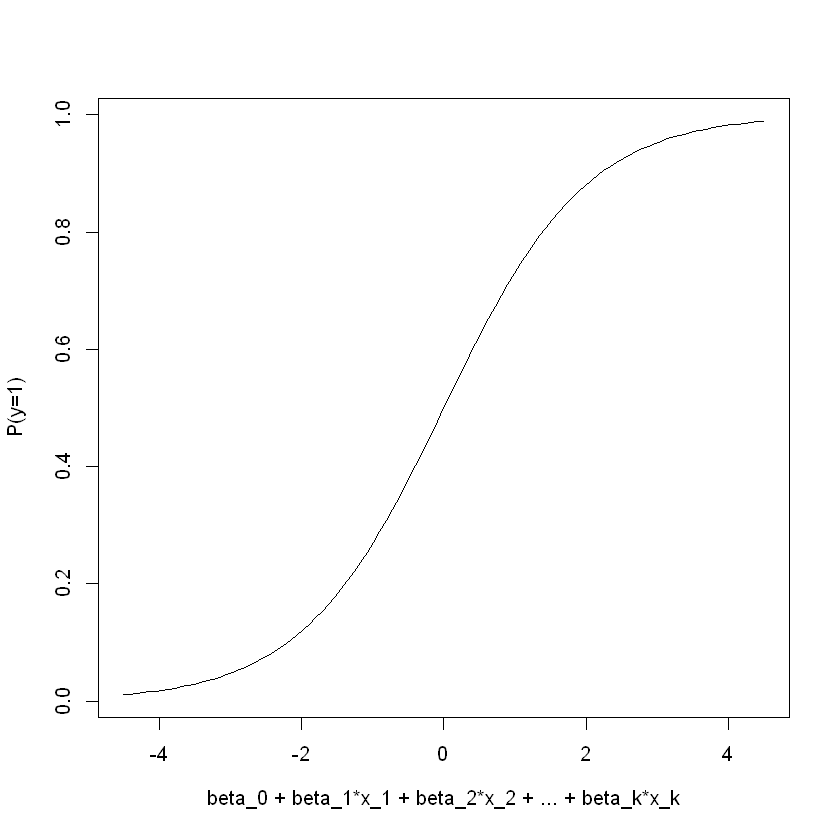

In [9]:
# Logistic function
logFunc <- function(x) {1 / (1+exp(-x))}

# Plot
xlab = expression("beta_0 + beta_1*x_1 + beta_2*x_2 + ... + beta_k*x_k")
curve(logFunc, from=-4.5, to=4.5, xlab=xlab, ylab="P(y=1)")

#### Quick question

Suppose the coefficients of a logistic regression model with two independent variables are as follows:

$\beta_0 = -1.5$, $\beta_1 = 3$, $\beta_2 = -0.5$.

And we have an observation with the following values for the independent variables:

$x_1 = 1$, $x_2 = 5$.

What is the value of the Logit for this observation? Recall that the Logit is log(Odds).

In [14]:
# Betas
b0 <- -1.5
b1 <- 3
b2 <- -0.5

# Observations
x1 <- 1
x2 <- 5

In [16]:
odds <- exp(b0 + b1*x1 + b2*x2)
Logit = log(odds)
print(Logit)

[1] -1


What is the value of the Odds for this observation? Note that you can compute $e^x$, for some number x, in your R console by typing exp(x). The function exp() computes the exponential of its argument.

In [17]:
print(odds)

[1] 0.3678794


What is the value of $P(y = 1)$ for this observation?

In [20]:
Py1 <- logFunc(Logit)
print(Py1)

[1] 0.2689414


### First contact with the Healthcare dataset

Let's read the data.

In [22]:
quality <- read.csv("quality.csv")
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


Let's look at the "Poor care" variable :

In [23]:
table(quality$PoorCare)


 0  1 
98 33 

We can see that 98 out of the 131 patients in our data set
received good care, or 0, and 33 patients received poor care,
or those labeled with 1.

For our modelisation, we need first a baseline model that we will define as the highest probability of care receiving.

In [4]:
PmaxCare <- 98/131
PmaxCare

[1] 0.7480916

Our baseline model has an accuracy of 75%.

### Splitting the dataset

In [6]:
library(caTools)

Let's randomly split our data into a training set and a testing set.

In [9]:
seed <- 88
set.seed(88)

split <- sample.split(quality$PoorCare, SplitRatio=0.75)

Let's take a look at this split variable.

In [10]:
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

There is a TRUE or FALSE value for each of our observations.

TRUE means that we should put that observation in the training set, and FALSE means that we should put that observation in the testing set.

So now let's create our training and testing sets using the subset function.

In [19]:
qualityTrain <- subset(quality, split == TRUE)
qualityTest <- subset(quality, split == FALSE)

In [20]:
nrow(qualityTrain)

[1] 99

### First modelization

We'll call our first model QualityLog and use the "glm" function for "generalized linear model" to build our logistic regression model.

In [21]:
QualityLog <- glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)

In [22]:
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


In [24]:
predictTrain <- predict(QualityLog, type="response")
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11910 0.15970 0.25250 0.26760 0.98460 

Let's compute the average prediction for each of the true outcomes.

In [25]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

#### Quick Question 2

In R, create a logistic regression model to predict "PoorCare" using the independent variables "StartedOnCombination" and "ProviderCount". Use the training set we created in the previous video to build the model.

What is the coefficient for "StartedOnCombination"?

In [26]:
QualityLogQQ <- glm(PoorCare ~ StartedOnCombination + ProviderCount, data=qualityTrain, family=binomial)

summary(QualityLogQQ)  # StartedOnCombinationTRUE :  1.95230


Call:
glm(formula = PoorCare ~ StartedOnCombination + ProviderCount, 
    family = binomial, data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.61826  -0.72782  -0.64555  -0.08407   1.94662  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.00097    0.55097  -3.632 0.000282 ***
StartedOnCombinationTRUE  1.95230    1.22342   1.596 0.110541    
ProviderCount             0.03366    0.01983   1.697 0.089706 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.89  on 98  degrees of freedom
Residual deviance: 104.37  on 96  degrees of freedom
AIC: 110.37

Number of Fisher Scoring iterations: 4


StartedOnCombination is a binary variable, which equals 1 if the patient is started on a combination of drugs to treat their diabetes, and equals 0 if the patient is not started on a combination of drugs.

All else being equal, does this model imply that starting a patient on a combination of drugs is indicative of poor care, or good care?

In [27]:
predictTrainQQ <- predict(QualityLogQQ, type="response")

In [28]:
tapply(predictTrainQQ, qualityTrain$PoorCare, mean)  # poor care probability > good care

0         1 
0.2308492 0.3166863

### Threshold values - Specificity & Sensitivity

In [30]:
thresh <- .5

In [31]:
table(qualityTrain$PoorCare, predictTrain > thresh)

   
    FALSE TRUE
  0    70    4
  1    15   10

We can see here that for 70 cases, we predict good care and they actually received good care, and for 10 cases, we predict poor care, and they actually received poor care.

We make four mistakes where we say poor care and it's actually good care, and we make 15 mistakes where we say good care, but it's actually poor care.

Let's compute the Sensitivity : $\frac{TruePositives}{Positives}$ and the Specificity : $\frac{TrueNegatives}{Negatives}$

In [2]:
sensitivity <- 10/(10+15)
print(sensitivity)

[1] 0.4


In [3]:
specificity <- 70/(70+4)
print(specificity)

[1] 0.9459459


Let's try another threshold of 0.7.

In [5]:
thresh <- .7

In [6]:
table(qualityTrain$PoorCare, predictTrain > thresh)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [7]:
sensitivity <- 8/(17+8)
print(sensitivity)

[1] 0.32


In [8]:
specificity <- 73/(73+1)
print(specificity)

[1] 0.9864865


By increasing the threshold, our sensitivity went down and our specificity went up.

Now, let's try decreasing the threshold.

In [9]:
thresh <- .2
table(qualityTrain$PoorCare, predictTrain > thresh)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [10]:
sensitivity <- 16/(9+16)
print(sensitivity)

[1] 0.64


In [11]:
specificity <- 54/(54+20)
print(specificity)

[1] 0.7297297


With the lower threshold, our sensitivity went up, and our specificity went down.

#### Quick Question 3 about threshold

In [30]:
matrix1 <- matrix(c(15,5, 10, 20), nrow = 2, ncol = 2)
rownames(matrix1) <- c("0", "1")
colnames(matrix1) <- c("False", "True")

In [31]:
matrix1

,False,True
0,15,10
1,5,20


What is the sensitivity of Confusion Matrix #1?

In [32]:
sensitivity1 <- 20/(5+20)
print(sensitivity1)

[1] 0.8


In [33]:
specificity1 <- 15/(15+10)
print(specificity1)

[1] 0.6


In [36]:
matrix2 <- matrix(c(20,10, 5, 15), nrow = 2, ncol = 2)
rownames(matrix2) <- c("0", "1")
colnames(matrix2) <- c("False", "True")

In [37]:
matrix2

,False,True
0,20,5
1,10,15


To go from Confusion Matrix #1 to Confusion Matrix #2, did we increase or decrease the threshold value?

In [38]:
sensitivity2 <- 15/(10+15)
print(sensitivity2)

[1] 0.6


In [39]:
sensitivity2 > sensitivity1

[1] FALSE

The sensitivity of matrix2 is lower than matrix1's.

This means that the threshold has increased.

#### Selection of the threshold via ROC curve

In [42]:
#install.packages("ROCR")
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [44]:
ROCRpred <- prediction(predictTrain, qualityTrain$PoorCare)
ROCRperf <- performance(ROCRpred, "tpr", "fpr")  # true positive rate, false prositive rate

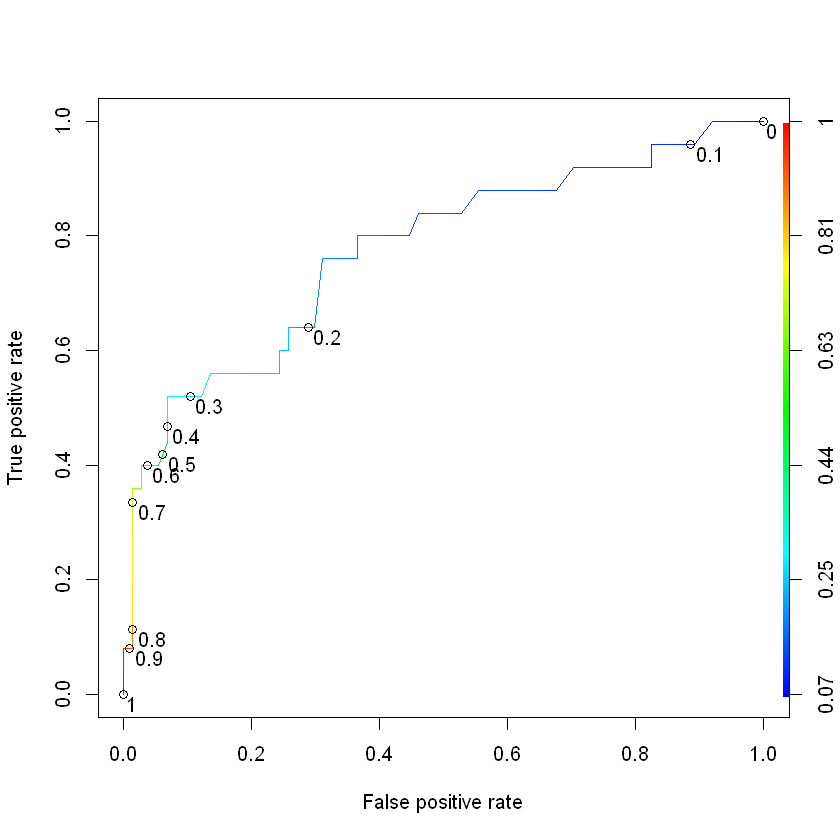

In [47]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,0.1), text.adj=c(-0.2,1.7))

#### Quick Question 4 : AUC

This question uses the original model with the independent variables "OfficeVisits" and "Narcotics".

What is the AUC of this model on the test set?

In [48]:
predictTest = predict(QualityLog, type="response", newdata=qualityTest)

ROCRpredTest = prediction(predictTest, qualityTest$PoorCare)

auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)

In [49]:
print(auc)

[1] 0.7994792


The AUC of a model has the following nice interpretation: 

Given a random patient from the dataset who actually received poor care, and a random patient from the dataset who actually received good care, the AUC is the percentage of time that our model will classify which is which correctly.

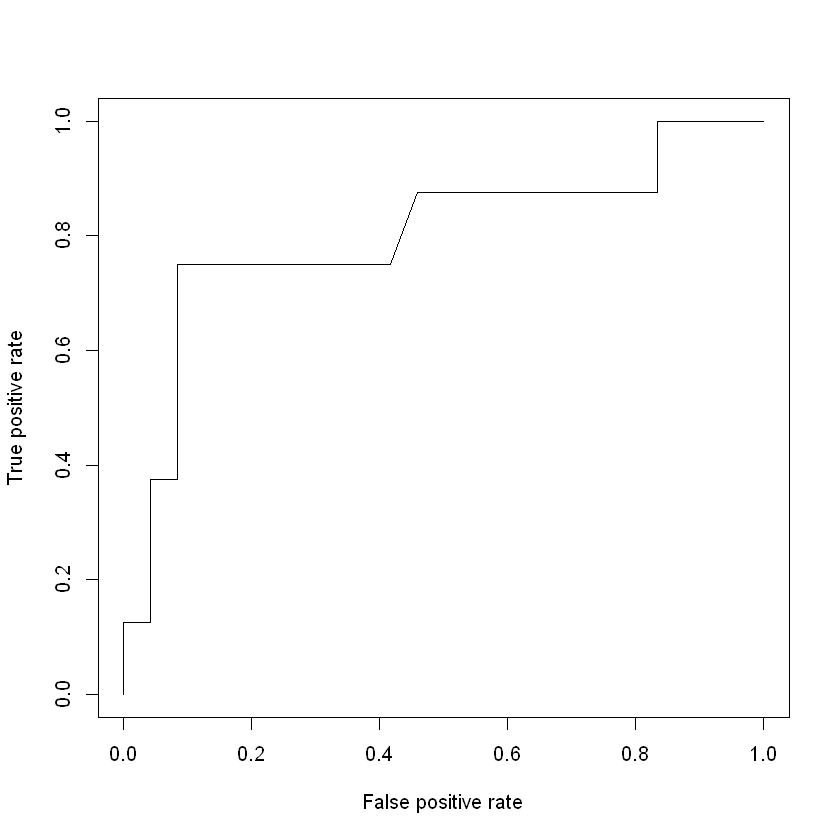

In [52]:
plot(performance(ROCRpredTest, "tpr", "fpr"))